# Reading the data

In [ ]:
! pip install -q kaggle

In [ ]:
 from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ahmednehad14","key":"479f0fc1e8a19cd1e283e98ba71e2289"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                  title                                       size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------  -----------------------------------------  -----  -------------------  -------------  ---------  ---------------  
thedrcat/daigt-v2-train-dataset                      DAIGT V2 Train Dataset                      29MB  2023-11-16 01:38:36           3050        252  1.0              
muhammadbinimran/housing-price-prediction-data       Housing Price Prediction Data              763KB  2023-11-21 17:56:32          12856        220  1.0              
thedrcat/daigt-proper-train-dataset                  DAIGT Proper Train Dataset                 119MB  2023-11-05 14:03:25           2367        185  1.0              
thedrcat/daigt-external-train-dataset                DAIGT External Train Dataset               435MB  2023-11-06 17:10:37            470         55  1.0       

In [ ]:
! kaggle datasets download -d 'alsaniipe/chest-x-ray-image'

 99% 2.04G/2.06G [00:23<00:00, 73.6MB/s]
100% 2.06G/2.06G [00:23<00:00, 92.6MB/s]


In [ ]:
!unzip /content/chest-x-ray-image.zip -d /content/data

Streaming output truncated to the last 5000 lines.
  inflating: /content/data/Data/train/COVID19/COVID19(228).jpg  
  inflating: /content/data/Data/train/COVID19/COVID19(229).jpg  
  inflating: /content/data/Data/train/COVID19/COVID19(23).jpg  
  inflating: /content/data/Data/train/COVID19/COVID19(230).jpg  
  inflating: /content/data/Data/train/COVID19/COVID19(231).jpg  
  inflating: /content/data/Data/train/COVID19/COVID19(232).jpg  
  inflating: /content/data/Data/train/COVID19/COVID19(233).jpg  
  inflating: /content/data/Data/train/COVID19/COVID19(234).jpg  
  inflating: /content/data/Data/train/COVID19/COVID19(235).jpg  
  inflating: /content/data/Data/train/COVID19/COVID19(236).jpg  
  inflating: /content/data/Data/train/COVID19/COVID19(237).jpg  
  inflating: /content/data/Data/train/COVID19/COVID19(238).jpg  
  inflating: /content/data/Data/train/COVID19/COVID19(239).jpg  
  inflating: /content/data/Data/train/COVID19/COVID19(24).jpg  
  inflating: /content/data/Data/train/COV

In [ ]:
from IPython.display import clear_output
!pip install vit_keras
clear_output()

In [ ]:
!pip install tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 6.4 MB/s eta 0:00:00


# Import libraries

In [ ]:
# Importing dependencies

import warnings
import logging
import os
warnings.filterwarnings('ignore')
logging.disable(logging.WARNING)
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import cv2

from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from vit_keras import vit


IMG_SIZE = 224, 224
BATCH_SIZE = 32
SEED = 999
AUTO = tf.data.AUTOTUNE
tf.random.set_seed(SEED)

# <span style="color:#e74c3c;"> Image </span> Processing

(-0.5, 1683.5, 1382.5, -0.5)

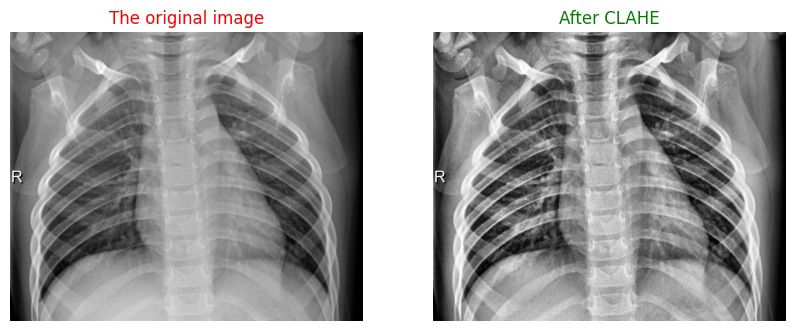

In [ ]:
# An example of image operations

normal_image = cv2.imread('/content/data/Data/train/NORMAL/NORMAL(1005).jpg')
normal_image = cv2.cvtColor(normal_image, cv2.COLOR_BGR2GRAY) #convert to gray

clahe_op = cv2.createCLAHE(clipLimit= 2) # histogram equalization
final_img = clahe_op.apply(normal_image)


fig, axs = plt.subplots(1,2, figsize = (10,5), dpi = 100)

axs[0].imshow(normal_image, cmap = 'gray')
axs[0].set_title('The original image', color = 'red')
axs[0].axis('off')

axs[1].imshow(final_img, cmap = 'gray')
axs[1].set_title('After CLAHE', color ='green')
axs[1].axis('off')

In [ ]:
# Creating new folders

os.mkdir(os.path.join('/content/working/', 'train'))
os.mkdir(os.path.join('/content/working/train/', 'COVID19'))
os.mkdir(os.path.join('/content/working/train/', 'NORMAL'))
os.mkdir(os.path.join('/content/working/train/', 'PNEUMONIA'))

os.mkdir(os.path.join('/content/working/', 'test'))
os.mkdir(os.path.join('/content/working/test/', 'COVID19'))
os.mkdir(os.path.join('/content/working/test/', 'NORMAL'))
os.mkdir(os.path.join('/content/working/test/', 'PNEUMONIA'))

In [ ]:
# A normal image > Gray Image > Histogram Equalization

def image_cvt_histeq(main_path, target_path):
    main_imgs = sorted(os.listdir(main_path))
    for i in main_imgs :

        img = cv2.imread(os.path.join(main_path, i))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        clahe_op = cv2.createCLAHE(clipLimit= 2)
        final_img = clahe_op.apply(img)

        cv2.imwrite(os.path.join(target_path, i), final_img)

In [ ]:
# Applying the image processing function to all images

image_cvt_histeq('/content/data/Data/train/COVID19', '/content/working/train/COVID19')
image_cvt_histeq('/content/data/Data/train/NORMAL', '/content/working/train/NORMAL')
image_cvt_histeq('/content/data/Data/train/PNEUMONIA', '/content/working/train/PNEUMONIA')

image_cvt_histeq('/content/data/Data/test/COVID19', '/content/working/test/COVID19')
image_cvt_histeq('/content/data/Data/test/NORMAL', '/content/working/test/NORMAL')
image_cvt_histeq('/content/data/Data/test/PNEUMONIA', '/content/working/test/PNEUMONIA')

# <span style="color:#e74c3c;"> Creating </span> Datasets

In [ ]:
# Creating main dataframe contains image paths and their classes.

def create_images_list(path):
    full_path = []
    images = sorted(os.listdir(path))
    for i in images:
        full_path.append(os.path.join(path, i))
    return full_path


train_NORMAL = create_images_list("/content/working/train/NORMAL")
train_COVID19 = create_images_list("/content/working/train/COVID19")
train_PNEUMONIA = create_images_list("/content/working/train/PNEUMONIA")


test_NORMAL = create_images_list("/content/working/test/NORMAL")
test_COVID19 = create_images_list("/content/working/test/COVID19")
test_PNEUMONIA = create_images_list("/content/working/test/PNEUMONIA")

# look-up table
classes = {0: 'NORMAL', 1: 'COVID19', 2: 'PNEUMONIA'}

train_data = pd.concat([pd.DataFrame({'img': train_NORMAL, 'label': 0 }),
                        pd.DataFrame({'img': train_COVID19, 'label': 1 }),
                        pd.DataFrame({'img': train_PNEUMONIA, 'label': 2 })], ignore_index = True )


test_data = pd.concat([pd.DataFrame({'img': test_NORMAL, 'label': 0 }),
                       pd.DataFrame({'img': test_COVID19, 'label': 1 }),
                       pd.DataFrame({'img': test_PNEUMONIA, 'label': 2 })], ignore_index = True )


train_data = shuffle(train_data, random_state = SEED).reset_index(drop = True)
test_data = shuffle(test_data, random_state = SEED).reset_index(drop = True)

print("train images -> ", train_data.shape[0])
print("test images -> ", test_data.shape[0])

train_data.head()

train images ->  5144
test images ->  1288


,img,label
0,/content/working/train/COVID19/COVID19(310).jpg,1
1,/content/working/train/PNEUMONIA/PNEUMONIA(445...,2
2,/content/working/train/PNEUMONIA/PNEUMONIA(139...,2
3,/content/working/train/PNEUMONIA/PNEUMONIA(201...,2
4,/content/working/train/NORMAL/NORMAL(805).jpg,0


# <span style="color:#e74c3c;"> Creating </span> tf.data Pipeline

In [ ]:
# Reading -> Resizing -> Normalization
def img_preprocessing(image, label):
    img = tf.io.read_file(image)
    img = tf.io.decode_jpeg(img, channels = 3)
    img = tf.image.resize(img, size = (IMG_SIZE))
    img = tf.cast(img, tf.float32) / 255.0

    return img, label


# Data augmentation
def augmentation(image, label):
    img = tf.image.random_brightness(image, 0.1, seed = SEED)
    img = tf.image.random_contrast(img, 0.2, 0.25, seed = SEED)

    return img, label

In [ ]:
# Creating dataset loaders and tf.datasets

train_loader = tf.data.Dataset.from_tensor_slices((train_data['img'], train_data['label']))
train_dataset = (train_loader
                 .map(img_preprocessing, num_parallel_calls = AUTO)
                 .map(augmentation, num_parallel_calls = AUTO)
                 .shuffle(BATCH_SIZE*20)
                 .batch(BATCH_SIZE)
                 .prefetch(AUTO))


test_loader = tf.data.Dataset.from_tensor_slices((test_data['img'], test_data['label']))
test_dataset = (test_loader
                .map(img_preprocessing, num_parallel_calls = AUTO)
                .batch(BATCH_SIZE)
                .prefetch(AUTO))

# <span style="color:#e74c3c;"> Pre-trained ViT </span> Model

In [ ]:
from vit_keras import vit

with tf.keras.backend.name_scope('stg'):
    vit_model = vit.vit_b16(image_size = IMG_SIZE, activation = 'softmax', pretrained = True, include_top = False, pretrained_top = False, classes = 3)

    inp = Input(shape = (*IMG_SIZE, 3))
    vit = vit_model(inp)
    X = Flatten()(vit)
    X = Dense(256, activation = 'gelu')(X)
    X = Dense(64, activation = 'gelu')(X)
    X = Dense(32, activation = 'gelu')(X)
    out = Dense(3, activation = 'softmax')(X)

    model = Model(inputs = inp, outputs = out)
    model.summary()

    model.compile(optimizer = tf.keras.optimizers.AdamW(learning_rate = 0.0001, weight_decay = 0.001),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(), metrics = ['acc'] )

347502902/347502902 [==============================] - 2s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vit-b16 (Functional)        (None, 768)               85798656  
                                                                 
 flatten (Flatten)           (None, 768)               0         
                                                                 
 dense (Dense)               (None, 256)               196864    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                            

In [ ]:
# Training model

hist = model.fit(train_dataset, epochs = 5, batch_size = BATCH_SIZE)

Epoch 1/5
161/161 [==============================] - 253s 1s/step - loss: 0.2570 - acc: 0.9001
Epoch 2/5
161/161 [==============================] - 207s 1s/step - loss: 0.1288 - acc: 0.9539
Epoch 3/5
161/161 [==============================] - 207s 1s/step - loss: 0.0809 - acc: 0.9701
Epoch 4/5
161/161 [==============================] - 207s 1s/step - loss: 0.0778 - acc: 0.9753
Epoch 5/5
161/161 [==============================] - 214s 1s/step - loss: 0.0616 - acc: 0.9806


# <span style="color:#e74c3c;"> Training</span> Results

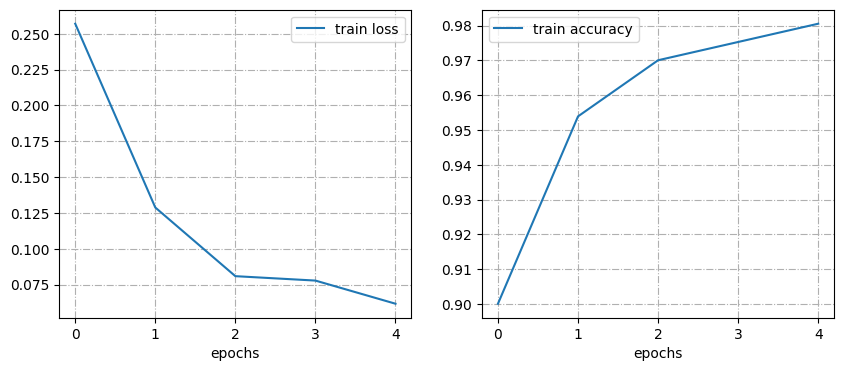

In [ ]:
fig, axs = plt.subplots(1,2, figsize = (10, 4), dpi = 100)

axs[0].grid(linestyle = 'dashdot')
axs[0].plot(hist.history['loss'])
axs[0].set_xlabel('epochs', fontsize = 10)
axs[0].legend(['train loss'], fontsize = 10)


axs[1].grid(linestyle = 'dashdot')
axs[1].plot(hist.history['acc'])
axs[1].set_xlabel('epochs', fontsize = 10)
axs[1].legend(['train accuracy'], fontsize = 10)

# <span style="color:#e74c3c;"> Test </span> Evaluations

In [ ]:
# Test evaluations of ViT model

with tf.keras.backend.name_scope('stg'):
    print('ViT model results')
    print('--'*50)
    test_eval_vit = model.evaluate(test_dataset)
    print('Test Loss: {0:.3f}'.format(test_eval_vit[0]))
    print('Test Accuracy: {0:.3f} %'.format(test_eval_vit[1]*100))

ViT model results
----------------------------------------------------------------------------------------------------
41/41 [==============================] - 22s 412ms/step - loss: 0.2964 - acc: 0.9115
Test Loss: 0.296
Test Accuracy: 91.149 %


# <span style="color:#e74c3c;"> Test </span> Prediction

In [ ]:
# predictions

with tf.keras.backend.name_scope('stg'):
    test_take1 =  test_dataset.take(-1)
    test_take1_ = list(test_take1)
    pred = model.predict(test_take1)
    pred = np.argmax(pred, axis = 1)


# Predictions and scores

mse = mean_squared_error(test_data['label'], pred)
f1 = f1_score(test_data['label'], pred, average = 'weighted')
acc = accuracy_score(test_data['label'], pred)

print('Mean Squared Error : {0:.5f}'.format(mse))
print('Weighted F1 Score : {0:.3f}'.format(f1))
print('Accuracy Score : {0:.3f} %'.format(acc*100))

41/41 [==============================] - 20s 425ms/step
Mean Squared Error : 0.33540
Weighted F1 Score : 0.915
Accuracy Score : 91.149 %


# <span style="color:#e74c3c;"> Classification </span> Report

In [ ]:
clf = classification_report(test_data['label'], pred, target_names = list(classes.values()))
print(clf)

              precision    recall  f1-score   support

      NORMAL       0.74      1.00      0.85       317
     COVID19       1.00      0.93      0.96       116
   PNEUMONIA       1.00      0.88      0.93       855

    accuracy                           0.91      1288
   macro avg       0.91      0.94      0.92      1288
weighted avg       0.93      0.91      0.92      1288



# <span style="color:#e74c3c;"> Confusion </span> Matrix

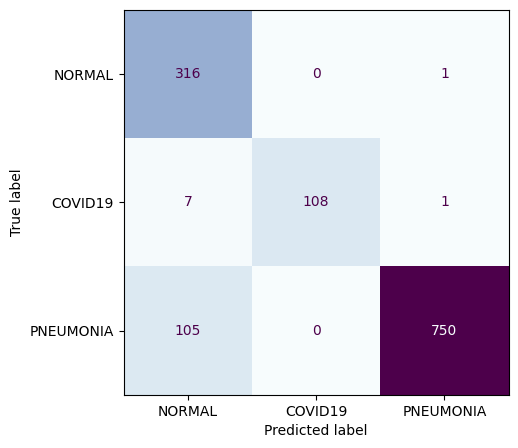

In [ ]:
cm = confusion_matrix(test_data['label'], pred)
cmd = ConfusionMatrixDisplay(cm, display_labels = list(classes.values()))

fig, ax = plt.subplots(figsize=(5,5))
cmd.plot(ax=ax,  cmap = 'BuPu', colorbar = False)

# <span style="color:#e74c3c;"> Test Set </span> Predictions

In [ ]:
# A function that creating 5 random images in the test set and predictions

# Red title -> a false prediction
# Green title -> a true prediction

def random_test_sample_with_prediction(SEED):
    idxs = np.random.default_rng(seed=SEED).permutation(len(pred))[:5]
    batch_idx = idxs // BATCH_SIZE
    image_idx = idxs-batch_idx * BATCH_SIZE
    idx = idxs

    fig, axs = plt.subplots(1,5, figsize = (12,12) ,dpi = 150)

    for i in range(5):
        img = test_take1_[batch_idx[i]][0][image_idx[i]]
        label = test_take1_[batch_idx[i]][1][image_idx[i]].numpy()


        if int(pred[idx[i]]) == label:
            axs[i].imshow(img, cmap = 'gray')
            axs[i].axis('off')
            axs[i].set_title('image (no: ' + str(idx[i])  + ')' + '\n' + classes[label], fontsize = 8, color = 'green')
        else:
            axs[i].imshow(img,  cmap = 'gray')
            axs[i].axis('off')
            axs[i].set_title('image (no: ' + str(idx[i])  + ')' + '\n' + classes[label], fontsize = 8, color = 'red')

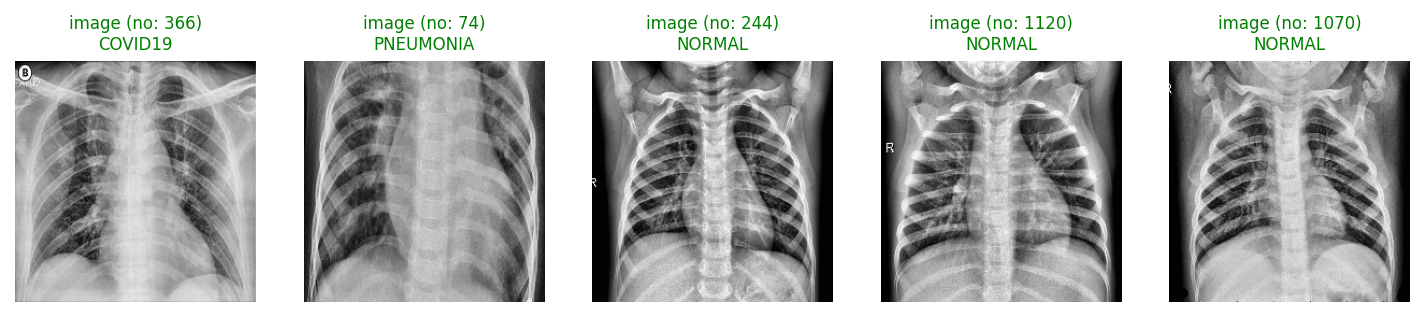

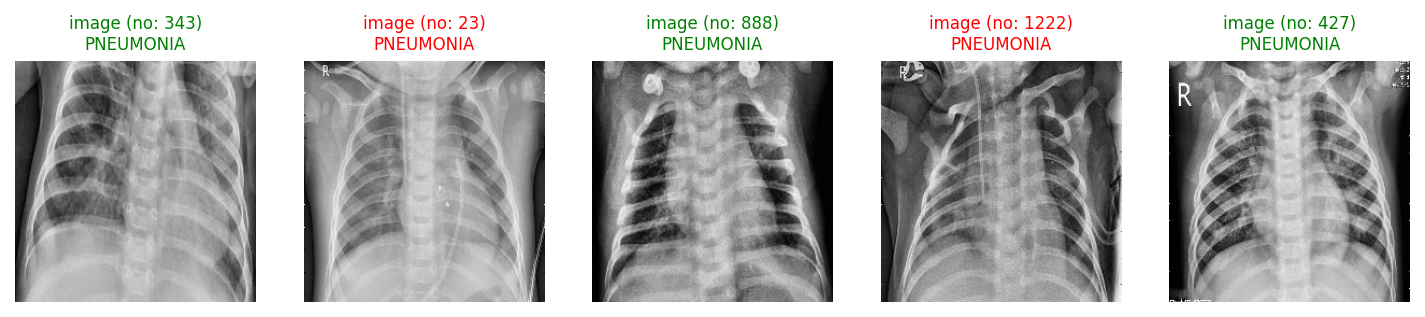

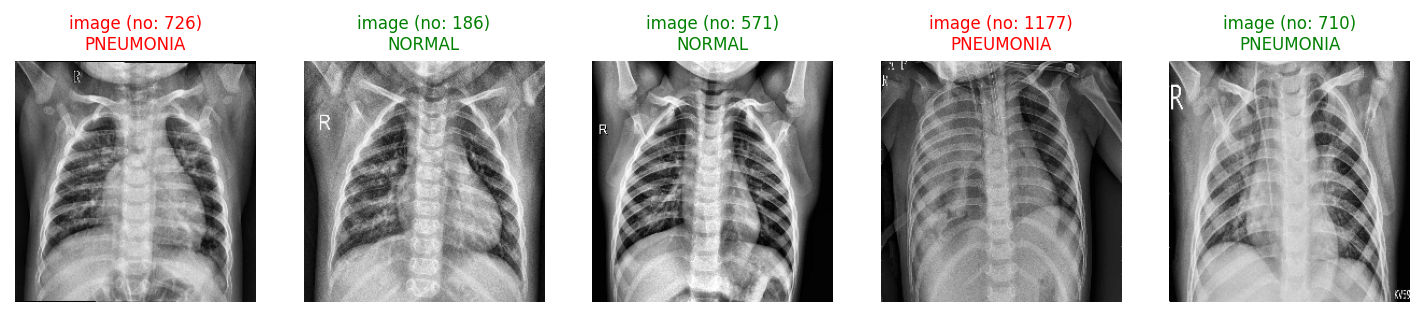

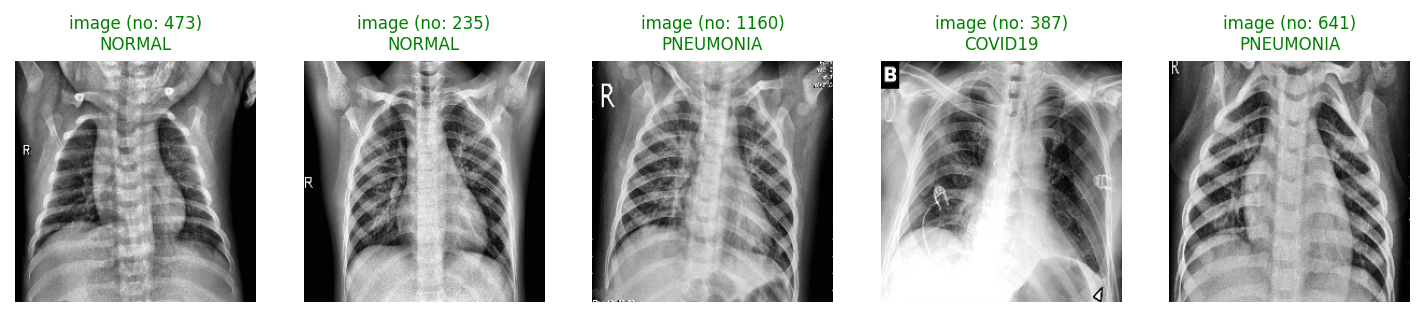

In [ ]:
# Red title -> a false prediction
# Green title -> a true prediction

random_test_sample_with_prediction(SEED = 5)
random_test_sample_with_prediction(SEED = 89)
random_test_sample_with_prediction(SEED = 24)
random_test_sample_with_prediction(SEED = 854)

# Test Saved model

In [ ]:
# Define the image size and seed
IMG_SIZE = (224, 224)
SEED = 42

# Assuming 'model' is defined before using this function
def predict(image_path, model):
    # Read and preprocess the image
    img = tf.io.read_file(image_path)
    img = tf.io.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, size=IMG_SIZE)
    img = tf.cast(img, tf.float32) / 255.0
    img = tf.image.random_brightness(img, 0.1, seed=SEED)
    img = tf.image.random_contrast(img, 0.2, 0.25, seed=SEED)

    # Expand dimensions to match the model's expected input shape
    img = tf.expand_dims(img, axis=0)

    # Make predictions
    pred = model.predict(img)

    # Get the predicted class index
    pred_class = np.argmax(pred, axis=1)[0]

    return pred_class
model = tf.keras.models.load_model('/content/version2.h5')  # Replace with the path to your model
image_path = '/content/working/test/PNEUMONIA/PNEUMONIA(3441).jpg'
prediction = predict(image_path, model)
print("Prediction:", prediction)
image_path = '/content/working/test/COVID19/COVID19(470).jpg'
prediction = predict(image_path, model)
print("Prediction:", prediction)
image_path = '/content/working/test/NORMAL/NORMAL(1273).jpg'
prediction = predict(image_path, model)
print("Prediction:", prediction)

1/1 [==============================] - 3s 3s/step
Prediction: 2
1/1 [==============================] - 0s 69ms/step
Prediction: 1
1/1 [==============================] - 0s 65ms/step
Prediction: 0


# Saving the model for deployment

In [ ]:
model.save("version2.h5")

In [ ]:
!zip -r /content/model.zip /content/version2.h5


  adding: content/version2.h5


zip error: Interrupted (aborting)


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp /content/model.zip '/content/drive/MyDrive/Semester 7/ML'
!cp /content/version2.h5 '/content/drive/MyDrive/Semester 7/ML'

In [ ]:
import pickle

# Save the model architecture
with open("/content/pickle/model_architecture.pkl", "wb") as arch_file:
    pickle.dump(model.to_json(), arch_file)

# Save the model weights
model.save_weights("/content/pickle/model_weights.h5")


In [ ]:
!cp -r /content/pickle '/content/drive/MyDrive/Semester 7/ML'